In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-03 12:41:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.81MB/s    in 5m 9s   

2021-06-03 12:46:11 (1022 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# extract zip file
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [4]:
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

train set = 1314 sample, validation set = 874 sample

In [5]:
# augmentation for train set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.4)
# augmentation for test set
test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest',
                                  validation_split=0.4)

In [6]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                          
])

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# import callback
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'model_checkpoints/'

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=True,
    verbose=1
)

In [12]:
history_checkpoint = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[checkpoint]
)

Epoch 1/20
25/25 - 35s - loss: 1.0943 - accuracy: 0.3922 - val_loss: 1.0155 - val_accuracy: 0.5125

Epoch 00001: saving model to model_checkpoints/
Epoch 2/20
25/25 - 34s - loss: 0.8378 - accuracy: 0.6545 - val_loss: 0.5996 - val_accuracy: 0.7812

Epoch 00002: saving model to model_checkpoints/
Epoch 3/20
25/25 - 34s - loss: 0.4565 - accuracy: 0.8455 - val_loss: 0.2266 - val_accuracy: 0.9250

Epoch 00003: saving model to model_checkpoints/
Epoch 4/20
25/25 - 34s - loss: 0.2423 - accuracy: 0.9104 - val_loss: 0.2949 - val_accuracy: 0.8813

Epoch 00004: saving model to model_checkpoints/
Epoch 5/20
25/25 - 35s - loss: 0.2021 - accuracy: 0.9337 - val_loss: 0.1813 - val_accuracy: 0.9563

Epoch 00005: saving model to model_checkpoints/
Epoch 6/20
25/25 - 34s - loss: 0.1916 - accuracy: 0.9455 - val_loss: 0.1275 - val_accuracy: 0.9438

Epoch 00006: saving model to model_checkpoints/
Epoch 7/20
25/25 - 34s - loss: 0.1562 - accuracy: 0.9455 - val_loss: 0.0947 - val_accuracy: 0.9750

Epoch 00007:

Saving 1VRzspyXpQ6A2rKy.png to 1VRzspyXpQ6A2rKy.png
1VRzspyXpQ6A2rKy.png
scissor


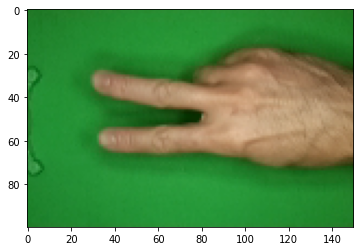

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissor')
  else:
    print('unknown')